In [34]:
# Import necessary libraries for preprocessing
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Load the dataset
#Atlanta_Distance = pd.read_pickle(r'~/Documents/NYCDSA/Capstone/Pickle Files/Atlanta_Nearest_POI.pkl')
Atlanta_Density = pd.read_csv('~/Documents/NYCDSA/Capstone/Density_Atlanta/Density_Atlanta.csv')
Atlanta_Density['TotalBath'] = Atlanta_Density['number_of_full_baths'] + (Atlanta_Density['number_of_half_baths']*0.5)
Atlanta_Density = Atlanta_Density.drop(columns=['ID', 'source_property_id', 'year_built', 'source_name',
                                                  'listing_date', 'mls_id', 'census_zcta5_geoid',
                                                  'census_cbsa_geoid', 'latitude', 'longitude', 'lot_size_in_acres', 'number_of_full_baths', 'number_of_half_baths'])
Atlanta_Density_One = Atlanta_Density.drop(columns=['WS_Five', 'VS_Five', 'SM_Five', 'SC_Five', 'C_Five'])
Atlanta_Density_One

,street_address,city,state,current_listing_price,number_of_bedrooms,living_area_square_feet,lot_size_in_square_feet,has_pool,has_garage,number_of_garage_spaces,number_of_stories,story_indicator,WS_One,VS_One,SM_One,SC_One,C_One,TotalBath
0,0 ivy MNR DR NW 0,Marietta,GA,2865,4,3259.0,14810.400390,False,True,NaN,2.0,Multi,0,0,0,0,0,2.5
1,1 10 buena VIS CIR SE,Cartersville,GA,2200,3,1993.0,NaN,False,False,NaN,NaN,NaN,0,2,0,1,2,2.0
2,1 1088 coldwater DR,Griffin,GA,2000,3,1910.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
3,1 1130 willivee DR,Decatur,GA,1995,3,1134.0,NaN,False,False,NaN,NaN,NaN,0,0,0,0,0,1.0
4,1 1307 idlewood CT,Mcdonough,GA,2800,4,2532.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21021,procurement only - 66 4th ST,Newnan,GA,1600,3,1367.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
21022,r2188 executive DR,Duluth,GA,2199,3,1696.0,871.199981,False,False,NaN,NaN,NaN,0,0,1,0,1,2.5
21023,r3339 woodward down,Buford,GA,2380,3,1944.0,4356.000065,False,False,NaN,NaN,NaN,1,1,1,1,0,3.5
21024,singleunit 216 greensprings DR,Palmetto,GA,1900,4,1204.0,NaN,False,False,NaN,NaN,NaN,0,1,0,0,1,2.0


In [35]:
# Exclude 'current_listing_price' from features
numeric_features = Atlanta_Density_One.select_dtypes(include=['int64', 'float64']).drop(columns=['current_listing_price']).columns
#categorical_features = list(Atlanta_Distance.columns[Atlanta_Distance.dtypes == 'object'])

In [36]:
# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.fillna("None")

# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
#categorical_transformer = Pipeline(steps=[
    #('impute_none', SimpleImputer(strategy='constant', fill_value='None')),  # Using SimpleImputer
    #('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Combined preprocessor for numeric and nominal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('nominal', categorical_transformer, categorical_features)
])

transformed_data = preprocessor.fit_transform(Atlanta_Density_One)

In [37]:
# Generate column names for the one-hot encoded features
#onehot_features = preprocessor.named_transformers_['nominal'].named_steps['onehot'].get_feature_names_out()
# Combine all feature names
all_feature_names = list(numeric_features)
all_feature_names

['number_of_bedrooms',
 'living_area_square_feet',
 'lot_size_in_square_feet',
 'number_of_garage_spaces',
 'number_of_stories',
 'WS_One',
 'VS_One',
 'SM_One',
 'SC_One',
 'C_One',
 'TotalBath']

In [38]:
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)
transformed_df

,number_of_bedrooms,living_area_square_feet,lot_size_in_square_feet,number_of_garage_spaces,number_of_stories,WS_One,VS_One,SM_One,SC_One,C_One,TotalBath
0,0.641572,1.314402,-0.032974,-7.852071e-16,0.00498,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,0.050733
1,-0.459448,0.111674,0.000000,-7.852071e-16,0.00000,-0.093701,2.854824,-0.527845,3.756596,1.972893,-0.167403
2,-0.459448,0.032822,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
3,-0.459448,-0.704394,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.603676
4,0.641572,0.623736,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
...,...,...,...,...,...,...,...,...,...,...,...
21021,-0.459448,-0.483039,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
21022,-0.459448,-0.170482,-0.033370,-7.852071e-16,0.00000,-0.093701,-0.411516,0.857559,-0.229586,0.798031,0.050733
21023,-0.459448,0.065123,-0.033271,-7.852071e-16,0.00000,10.672215,1.221654,0.857559,3.756596,-0.376832,0.487006
21024,0.641572,-0.637893,0.000000,-7.852071e-16,0.00000,-0.093701,1.221654,-0.527845,-0.229586,0.798031,-0.167403


In [39]:
from xgboost import XGBRegressor
# Assuming RandomForest is part of your models dictionary
xgb_model = XGBRegressor(random_state=42)
# Define the full model pipeline including the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])
X = Atlanta_Density_One.drop(columns='current_listing_price')
y = Atlanta_Density_One['current_listing_price']
# Fit the model pipeline
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['number_of_bedrooms', 'living_area_square_feet',
       'lot_size_in_square_feet', 'number_of_garage_spaces',
       'number_of_stories', 'WS_One', 'VS_One', 'SM_One', 'SC_One', 'C_One',
       'TotalBath'],
      dtype='object'))])...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [40]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_score_gb = cross_val_score(pipeline, X, y, scoring = 'r2', cv=kf, n_jobs = -1)
print(cross_val_score_gb)
print('Avg Score:',np.mean(cross_val_score_gb))
print('Variance:',np.var(cross_val_score_gb))

[0.37753876 0.4555423  0.50347108 0.49378693 0.45596967 0.43244861
 0.46755636 0.43419216 0.49540054 0.44554686]
Avg Score: 0.45614532653429196
Variance: 0.0012662991758678286


In [41]:
param_grid = {
    'regressor__n_estimators': [200],       # Number of trees
    'regressor__learning_rate': [0.1],     # Learning rate (shrinkage)
    'regressor__max_depth': [7],                # Maximum depth of the trees
    'regressor__subsample': [0.7],               # Fraction of samples to be used per tree
    'regressor__colsample_bytree': [0.7],        # Fraction of features to be used per tree
    'regressor__gamma': [1]                 # Minimum loss reduction for a split
}

grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)
# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score (negative R2)
print("Best cross-validation score (R2):", grid_search.best_score_)

Best hyperparameters: {'regressor__colsample_bytree': 0.7, 'regressor__gamma': 1, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 200, 'regressor__subsample': 0.7}
Best cross-validation score (R2): 0.4851653433344751


In [42]:
best_xgb_model = grid_search.best_estimator_.named_steps['regressor']
feature_importances = best_xgb_model.feature_importances_

In [43]:
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(all_feature_names)[sorted_indices]

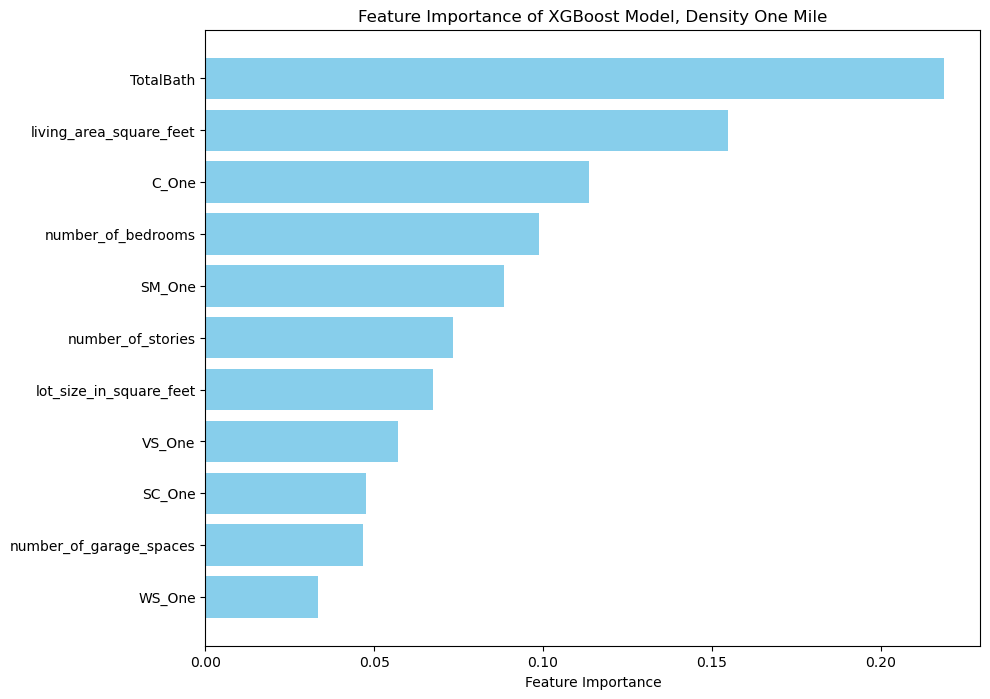

In [44]:
# Create a bar chart for feature importance
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of XGBoost Model, Density One Mile')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [45]:
Atlanta_Density_Five = Atlanta_Density.drop(columns=['WS_One', 'VS_One', 'SM_One', 'SC_One', 'C_One'])
numeric_features = Atlanta_Density_Five.select_dtypes(include=['int64', 'float64']).drop(columns=['current_listing_price']).columns
# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.fillna("None")

# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combined preprocessor for numeric and nominal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('nominal', categorical_transformer, categorical_features)
])

transformed_data = preprocessor.fit_transform(Atlanta_Density_Five)

In [46]:
# Combine all feature names
all_feature_names = list(numeric_features)
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

In [47]:
# Assuming RandomForest is part of your models dictionary
xgb_model = XGBRegressor(random_state=42)
# Define the full model pipeline including the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])
X = Atlanta_Density_Five.drop(columns='current_listing_price')
y = Atlanta_Density_Five['current_listing_price']
# Fit the model pipeline
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['number_of_bedrooms', 'living_area_square_feet',
       'lot_size_in_square_feet', 'number_of_garage_spaces',
       'number_of_stories', 'WS_Five', 'VS_Five', 'SM_Five', 'SC_Five',
       'C_Five', 'TotalBath'],
      dtype='object...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [48]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, Atlanta_Density_Five.drop(columns='current_listing_price'), Atlanta_Density_Five['current_listing_price'], scoring = 'r2', cv=kf, n_jobs = -1)
print('Avg Score:',np.mean(scores))
print('Variance:',np.var(scores))

Avg Score: 0.5996213024881177
Variance: 0.0007460313781125223


In [49]:
param_grid = {
    'regressor__n_estimators': [500],       # Number of trees
    'regressor__learning_rate': [0.1],     # Learning rate (shrinkage)
    'regressor__max_depth': [9],                # Maximum depth of the trees
    'regressor__subsample': [1.0],               # Fraction of samples to be used per tree
    'regressor__colsample_bytree': [0.7],        # Fraction of features to be used per tree
    'regressor__gamma': [0.5]                # Minimum loss reduction for a split
}

grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)
# Print the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score (negative R2)
print("Best cross-validation score (R2):", grid_search.best_score_)

Best hyperparameters: {'regressor__colsample_bytree': 0.7, 'regressor__gamma': 0.5, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 9, 'regressor__n_estimators': 500, 'regressor__subsample': 1.0}
Best cross-validation score (R2): 0.6397662999501736


In [50]:
best_xgb_model = grid_search.best_estimator_.named_steps['regressor']
feature_importances = best_xgb_model.feature_importances_

In [51]:
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(all_feature_names)[sorted_indices]

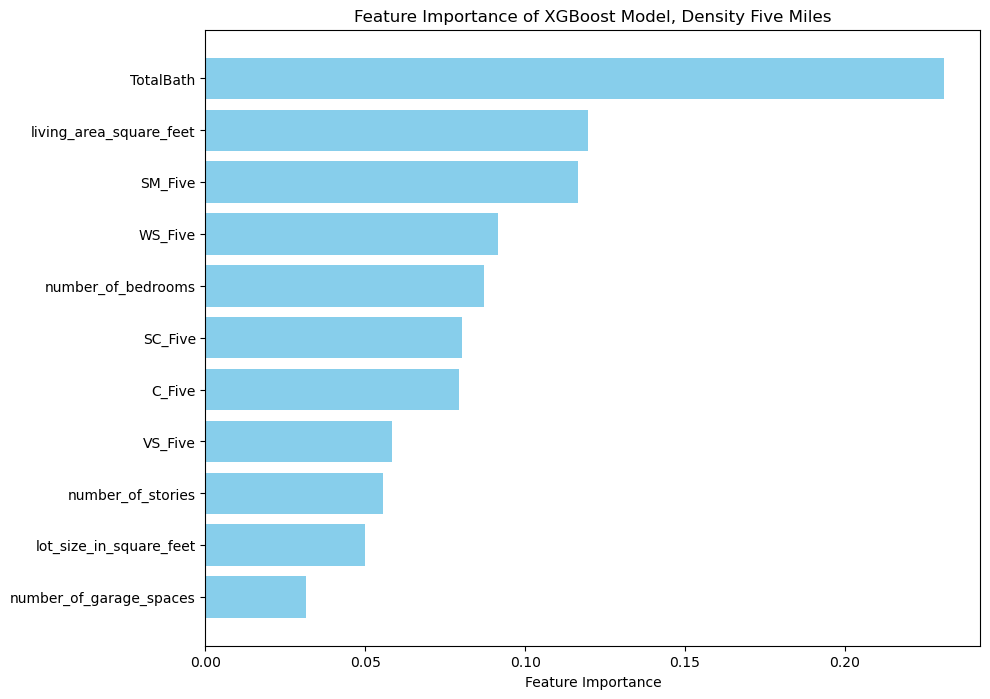

In [52]:
# Create a bar chart for feature importance
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of XGBoost Model, Density Five Miles')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()